In [ ]:
#Question 3: What is the typical structure of conversations between developers and ChatGPT? How many
#turns does it take on average to reach a conclusion?

#I will investigate this in the context of both the discussion sharings and the issue sharings 


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind

#idea: compare number of prompts in discussions to issues 

In [6]:
#load the conversation data from the file
with open('20230727_195954_discussion_sharings.json', 'r', encoding='utf-8') as f:
    disc_data = json.load(f)

In [8]:
#Load the discussions data

disc_df = pd.json_normalize(
            disc_data["Sources"],
            record_path=["ChatgptSharing"],  # Path to nested data
            meta=["Author"],  # Include top-level metadata
            sep="_"
        )

In [10]:
#how many prompts on average per conversation? AKA how many turns

print(disc_df['NumberOfPrompts'].mean())

5.2727272727272725


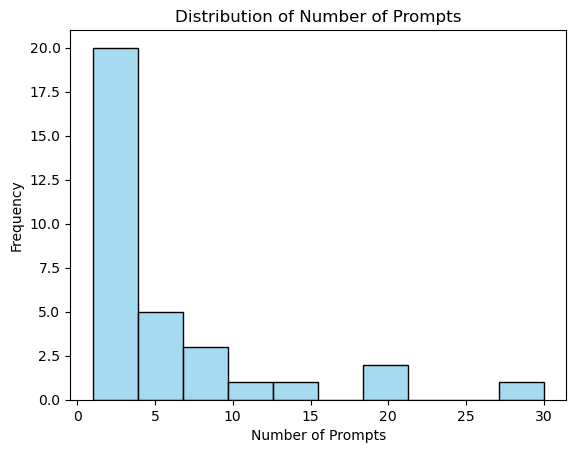

In [14]:
#Visualize the distribution of number of prompts

sns.histplot(disc_df['NumberOfPrompts'], color='skyblue')
plt.title('Distribution of Number of Prompts')
plt.xlabel('Number of Prompts')
plt.ylabel('Frequency')
plt.show()

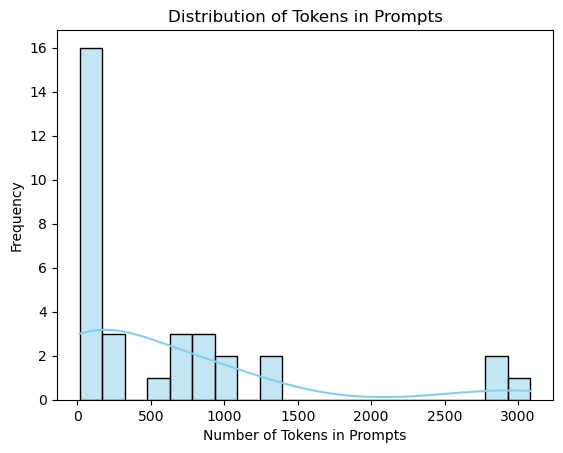

In [16]:
#Visualize the distribution of tokens in prompts
sns.histplot(disc_df['TokensOfPrompts'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tokens in Prompts')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Frequency')
plt.show()

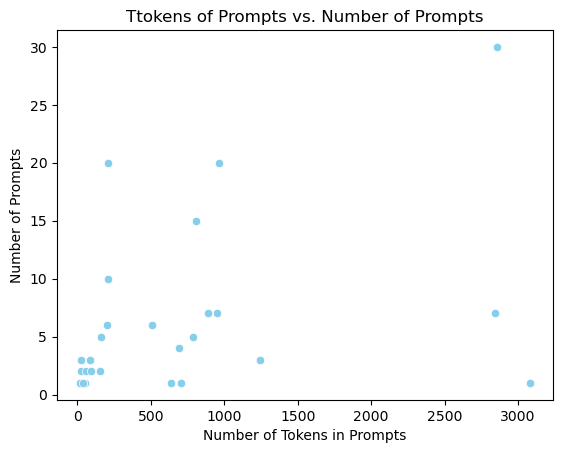

In [18]:
#visualize the relationship between number of tokens and number of prompts

sns.scatterplot(x='TokensOfPrompts', y='NumberOfPrompts', data=disc_df, color='skyblue')
plt.title('Ttokens of Prompts vs. Number of Prompts')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Number of Prompts')
plt.show()

In [67]:
longest_prompts = disc_df.loc[disc_df['TokensOfPrompts'] == disc_df['TokensOfPrompts'].max(), 'Conversations']
print(longest_prompts)

2    [{'Prompt': '===
Author: JushBJJ
Name: "Mr. Ra...
Name: Conversations, dtype: object


In [20]:
#load the issue data from the file
with open('20230727_195941_issue_sharings.json', 'r', encoding='utf-8') as d:
    issue_data = json.load(d)

#Load the conversations data

issue_df = pd.json_normalize(
            issue_data["Sources"],
            record_path=["ChatgptSharing"],  # Path to nested data
            meta=["Author"],  # Include top-level metadata
            sep="_"
        )

#Get the mean number of turns
print(issue_df['NumberOfPrompts'].mean())

4.57201646090535


In [77]:
longest_prompts_issues = issue_df.loc[issue_df['TokensOfPrompts'] == issue_df['TokensOfPrompts'].max(), 'Conversations']
print(longest_prompts_issues)

75    [{'Prompt': 'i.add_css('selector', 'div#breadc...
Name: Conversations, dtype: object


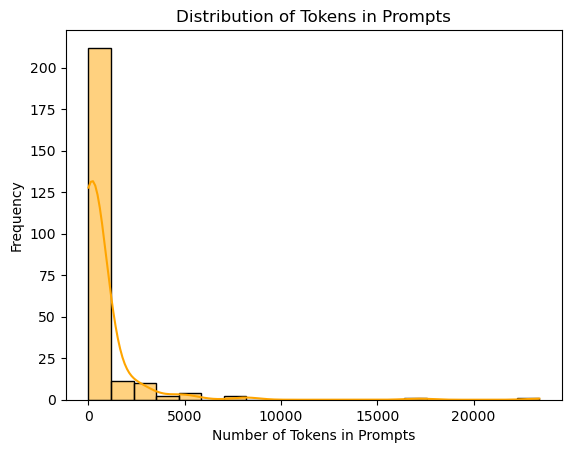

In [22]:
#Visualize the distribution of tokens in prompts
sns.histplot(issue_df['TokensOfPrompts'], bins=20, kde=True, color='orange')
plt.title('Distribution of Tokens in Prompts')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Frequency')
plt.show()

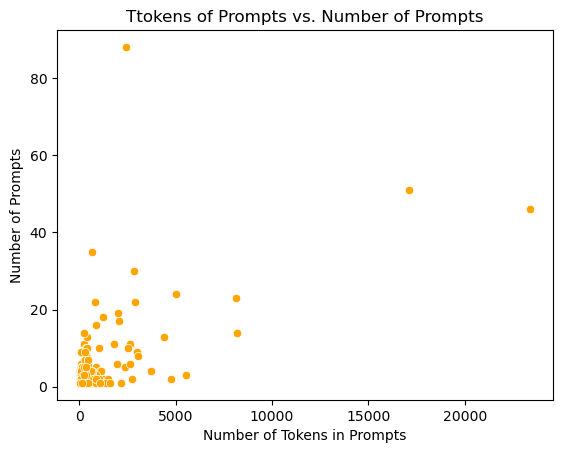

In [24]:
#visualize the relationship between number of tokens and number of prompts

sns.scatterplot(x='TokensOfPrompts', y='NumberOfPrompts', data=issue_df, color='orange')
plt.title('Ttokens of Prompts vs. Number of Prompts')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Number of Prompts')
plt.show()

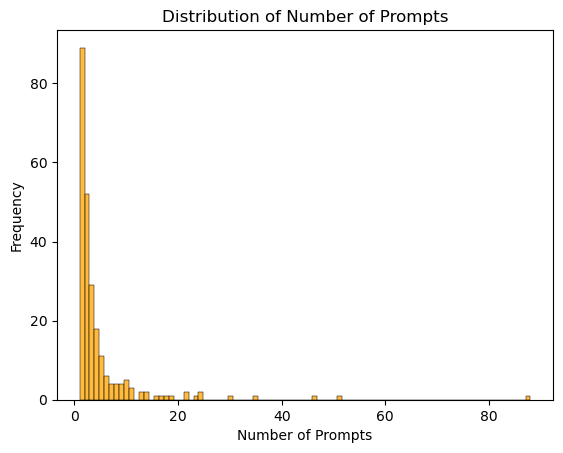

In [26]:
#Visualize the distribution of number of issues prompts

sns.histplot(issue_df['NumberOfPrompts'], color='orange')
plt.title('Distribution of Number of Prompts')
plt.xlabel('Number of Prompts')
plt.ylabel('Frequency')
plt.show()

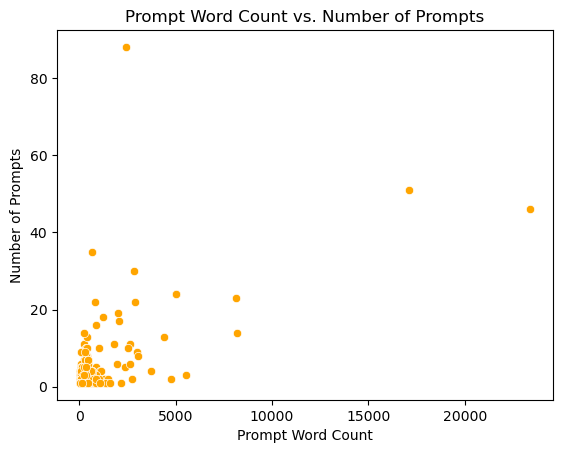

In [30]:
#Visualize the prompt length vs number of turns

sns.scatterplot(x='TokensOfPrompts', y='NumberOfPrompts', data=issue_df, color='orange')
plt.title('Prompt Word Count vs. Number of Prompts')
plt.xlabel('Prompt Word Count')
plt.ylabel('Number of Prompts')
plt.show()
    

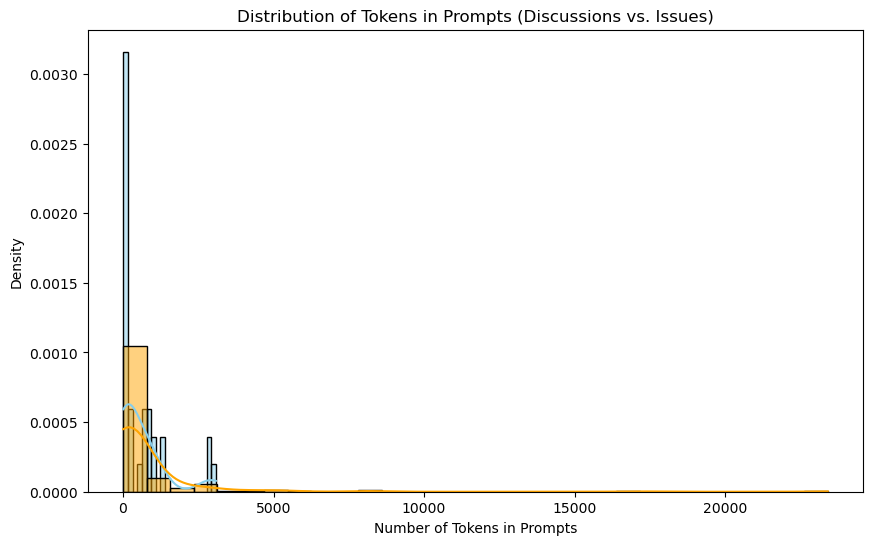

In [32]:
#now that we have understood the issues and discussion data, let's compare them

plt.figure(figsize=(10,6))
sns.histplot(disc_df['TokensOfPrompts'], bins=20, kde=True, label='Discussions', color='skyblue', stat='density')
sns.histplot(issue_df['TokensOfPrompts'], bins=30, kde=True, label='Discussions', color='orange', stat='density')
plt.title('Distribution of Tokens in Prompts (Discussions vs. Issues)')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Density')
plt.show()
    

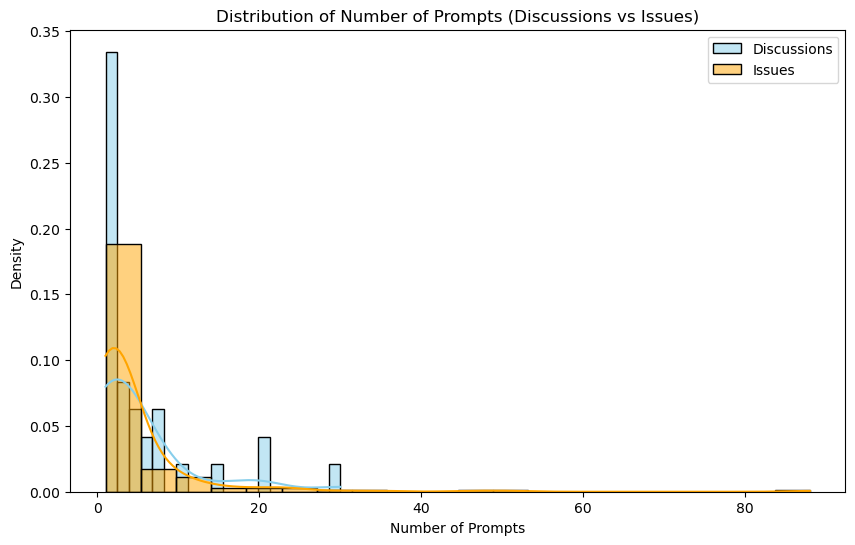

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(disc_df['NumberOfPrompts'], bins=20, kde=True, label='Discussions', color='skyblue', stat='density')
sns.histplot(issue_df['NumberOfPrompts'], bins=20, kde=True, label='Issues', color='orange', stat='density')
plt.title('Distribution of Number of Prompts (Discussions vs Issues)')
plt.xlabel('Number of Prompts')
plt.ylabel('Density')
plt.legend()
plt.show()

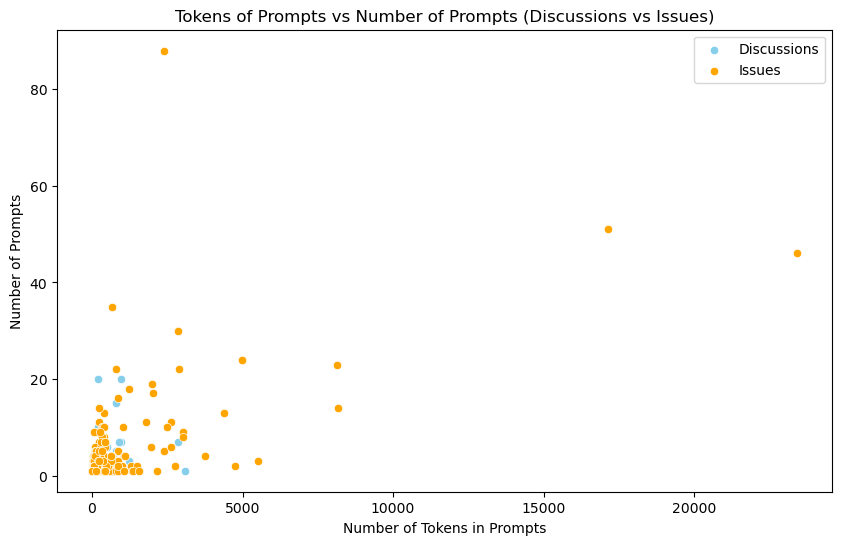

In [93]:
# Scatter plot for Tokens of Prompts vs Number of Prompts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TokensOfPrompts', y='NumberOfPrompts', data=disc_df, color='skyblue', label='Discussions')
sns.scatterplot(x='TokensOfPrompts', y='NumberOfPrompts', data=issue_df, color='orange', label='Issues')
plt.title('Tokens of Prompts vs Number of Prompts (Discussions vs Issues)')
plt.xlabel('Number of Tokens in Prompts')
plt.ylabel('Number of Prompts')
plt.legend()
plt.show()

In [107]:
#Use Mann-Whitney U test to compare the medians of tokens of prompts per conversation between the discussions and issues
#Useful to compare medians rather than means due to large outliers 

disc_df['TokensPerPrompt'] = disc_df['TokensOfPrompts'] / disc_df['NumberOfPrompts']
issue_df['TokensPerPrompt'] = issue_df['TokensOfPrompts'] / issue_df['NumberOfPrompts']

tokens_per_prompt_disc = disc_df['TokensPerPrompt'].dropna()
tokens_per_prompt_issue = issue_df['TokensPerPrompt'].dropna()

u_stat_tokens, p_value_tokens = mannwhitneyu(tokens_per_prompt_disc, tokens_per_prompt_issue, alternative='two-sided')
print(f"Mann-Whitney U test for tokens per prompt: U-statistic = {u_stat_tokens}, p-value = {p_value_tokens}")

number_of_prompts_disc = disc_df['NumberOfPrompts'].dropna()
number_of_prompts_issue = issue_df['NumberOfPrompts'].dropna()

u_stat_prompts, p_value_prompts = mannwhitneyu(number_of_prompts_disc, number_of_prompts_issue, alternative='two-sided')
print(f"Mann-Whitney U test for number of prompts per conversation: U-statistic = {u_stat_prompts}, p-value = {p_value_prompts}")


Mann-Whitney U test for tokens per prompt: U-statistic = 4160.5, p-value = 0.7264711448267807
Mann-Whitney U test for number of prompts per conversation: U-statistic = 4360.0, p-value = 0.40154737093183646


In [111]:
#Perform t-test to compare the means of tokens per prompt and prompts per conversation

t_stat_tokens, p_value_tokens = ttest_ind(tokens_per_prompt_disc, tokens_per_prompt_issue)
print(f"T-test for tokens per prompt: t-statistic = {t_stat_tokens}, p-value = {p_value_tokens}")

t_stat_prompts, p_value_prompts = ttest_ind(number_of_prompts_disc, number_of_prompts_issue)
print(f"T-test for number of prompts per conversation: t-statistic = {t_stat_prompts}, p-value = {p_value_prompts}")

T-test for tokens per prompt: t-statistic = 0.6292463034411778, p-value = 0.5297120968189724
T-test for number of prompts per conversation: t-statistic = 0.4590613298133296, p-value = 0.6465540835195906


In [117]:

print(disc_df['NumberOfPrompts'].mean())
print(issue_df['NumberOfPrompts'].mean())

print(tokens_per_prompt_disc.mean())
print(tokens_per_prompt_issue.mean())


5.2727272727272725
4.57201646090535
215.16168831168832
172.66100360343665


In [ ]:
#Although the means for number of prompts are different, this different was not found to be significantly diffferent. 